## Modeling C02 Emisson in New Cars
(The unit of measure typically used for CO2 emissions 
in cars is grams per kilometer (g/km).) 


### Descriptive modelling

Descriptive modeling is a type of statistical analysis that aims to describe 
the characteristics of a population or a sample.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from pmdarima.arima import auto_arima

In [150]:
df = pd.read_csv("./carbon-new-passenger-vehicles.csv")
df = df.rename(columns={'Year': 'YR'})

In [151]:
df.index = pd.to_datetime(df['YR'], format='%Y')
df = df.rename_axis('Year')

df.reset_index(inplace=True)

In [152]:
df.dtypes

Year            datetime64[ns]
Country                 object
Code                    object
YR                       int64
new_cars_co2           float64
dtype: object

In [153]:
df.head()

,Year,Country,Code,YR,new_cars_co2
0,2001-01-01,Austria,AUT,2001,166.040554
1,2002-01-01,Austria,AUT,2002,163.946758
2,2003-01-01,Austria,AUT,2003,163.217461
3,2004-01-01,Austria,AUT,2004,162.396575
4,2005-01-01,Austria,AUT,2005,163.695643


### Calculate the average and sum by year for new car c02 emissions

In [157]:
# Assuming your original DataFrame is called df

avg_c02_per_year = df.groupby('Year')['new_cars_co2'].mean()
sum_c02_per_year = df.groupby('Year')['new_cars_co2'].sum()
# Create a new DataFrame to store the results
new_df = pd.DataFrame({
    'avg_per_km': avg_c02_per_year,
    'sum_per_km': sum_c02_per_year   
})
new_df.reset_index(inplace=True)

In [159]:
new_df.head()

,Year,avg_per_km,sum_per_km
0,2001-01-01,171.252685,2568.790280
1,2002-01-01,168.991638,2534.874565
2,2003-01-01,168.455187,2526.827804
3,2004-01-01,166.666715,2500.000724
4,2005-01-01,165.209092,2478.136380


In [160]:
new_df.describe()

,avg_per_km,sum_per_km
count,19.000000,19.000000
mean,142.106097,2266.974396
std,22.347494,199.434408
min,113.671847,1953.967490
25%,118.790623,2110.403918
50%,141.754025,2196.130386
75%,164.378768,2465.681524
max,171.252685,2568.790280


### Plot Mean c02 Emission per year (g/km)

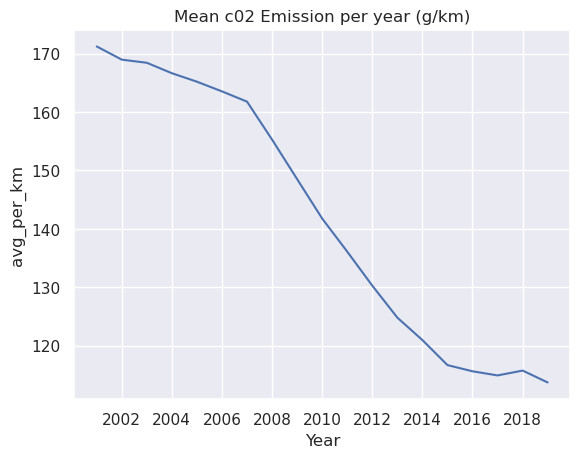

In [162]:
sns.lineplot(x='Year',y='avg_per_km',data=new_df)
plt.title('Mean c02 Emission per year (g/km)')
plt.show()

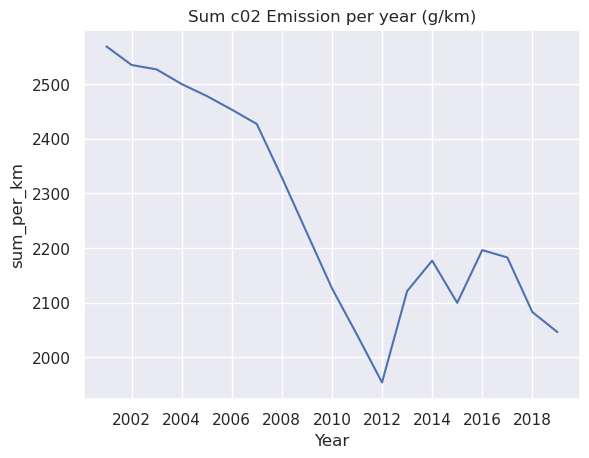

In [163]:
sns.lineplot(x='Year',y='sum_per_km',data=new_df)
plt.title('Sum c02 Emission per year (g/km)')
plt.show()

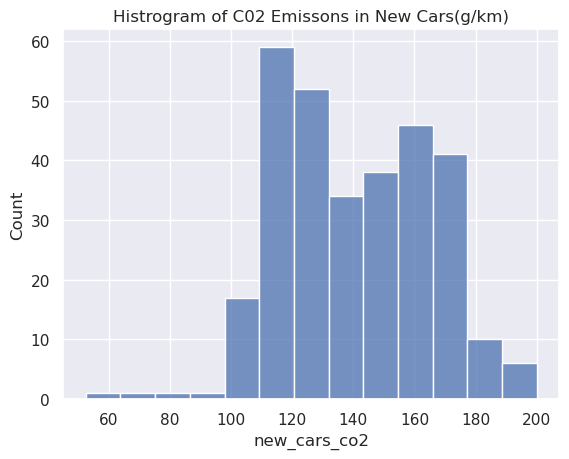

In [165]:
sns.histplot(x='new_cars_co2',data=df)
plt.title('Histrogram of C02 Emissons in New Cars(g/km)')
plt.show()

<Figure size 1000x500 with 0 Axes>

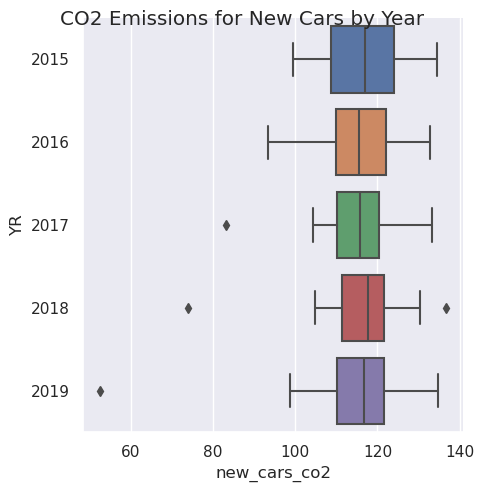

In [166]:

plt.figure(figsize=(10, 5))
sns.catplot(x='new_cars_co2', y='YR', kind='box', data=df, order=[2015, 2016, 2017, 2018, 2019], orient='h')
plt.suptitle('CO2 Emissions for New Cars by Year\n')
plt.show()


In [164]:
# Assuming your DataFrame is called df
top_countries_2019 = df[df['Year']=='2019-01-01'].nlargest(3, 'new_cars_co2')['Country']
top_countries = df[df['Country'].isin(top_countries_2019)]


In [167]:
top_countries.head()

,Year,Country,Code,YR,new_cars_co2
95,2001-01-01,Germany,DEU,2001,178.923476
96,2002-01-01,Germany,DEU,2002,176.071796
97,2003-01-01,Germany,DEU,2003,176.482520
98,2004-01-01,Germany,DEU,2004,174.154498
99,2005-01-01,Germany,DEU,2005,172.121882


In [ ]:
## Pull and Plot Germany, Luxembourg and Switzerland

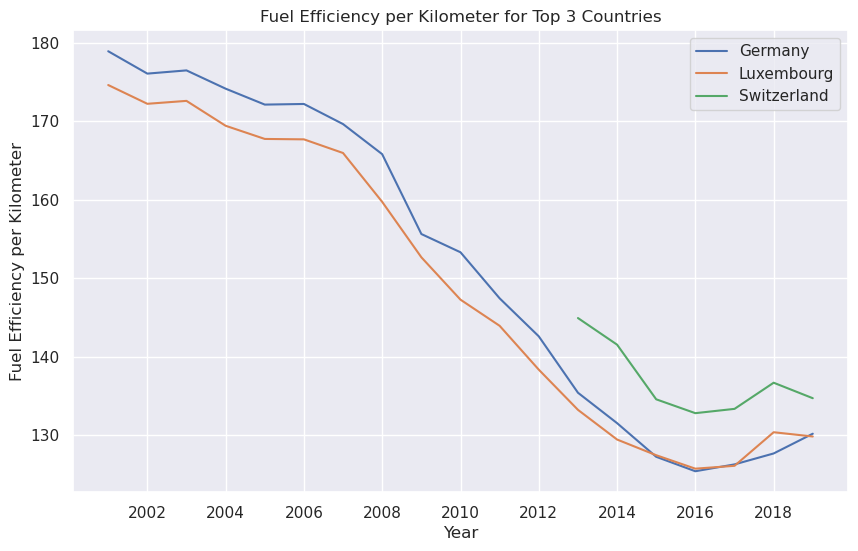

In [168]:
# Assuming you have imported seaborn as sns and matplotlib.pyplot as plt
sns.set(style='darkgrid')
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='new_cars_co2', hue='Country', data=top_countries)
plt.legend()
plt.title('Fuel Efficiency per Kilometer for Top 3 Countries')
plt.xlabel('Year')
plt.ylabel('Fuel Efficiency per Kilometer')
plt.show()


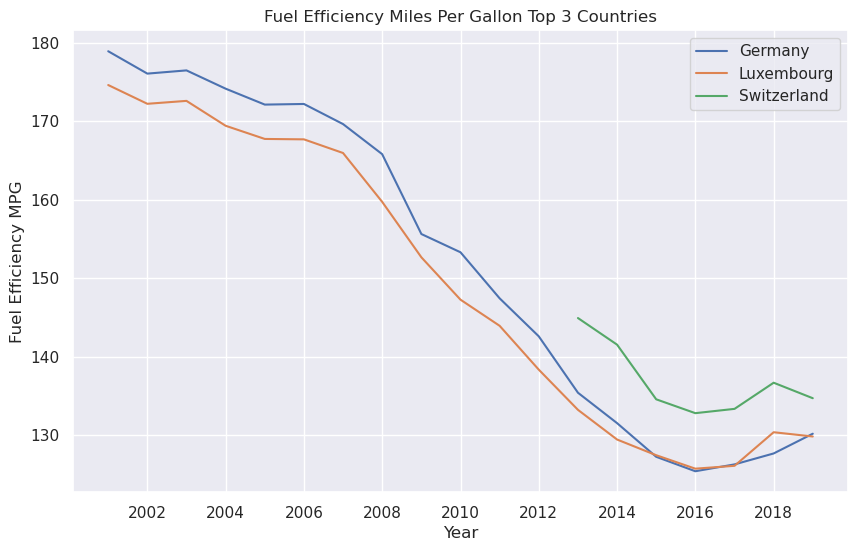

In [169]:
# Assuming you have imported seaborn as sns and matplotlib.pyplot as plt
sns.set(style='darkgrid')
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='new_cars_co2', hue='Country', data=top_countries)
plt.legend()
plt.title('Fuel Efficiency Miles Per Gallon Top 3 Countries')
plt.xlabel('Year')
plt.ylabel('Fuel Efficiency MPG')
plt.show()

## Predicting Average C02 Emissions in New Cars for next 5 Years

### What is Algorithm
In computer science, an algorithm is a sequence of instructions that a computer program follows in order to perform a particular task. Algorithms can range from simple, like adding two numbers, to highly complex, like sorting a large dataset or performing machine learning.

### A

In [172]:
new_df.dtypes

Year          datetime64[ns]
avg_per_km           float64
sum_per_km           float64
dtype: object

In [173]:
new_df.set_index('Year', inplace=True)
model = auto_arima(new_df['avg_per_km'], seasonal=False, suppress_warnings=True)

# Generate predictions for next 5 years
forecast = model.predict(n_periods=5)

# Print predicted values
print(forecast)

2020-01-01    111.365536
2021-01-01    108.866218
2022-01-01    106.229708
2023-01-01    103.495682
2024-01-01    100.692342
Freq: AS-JAN, dtype: float64


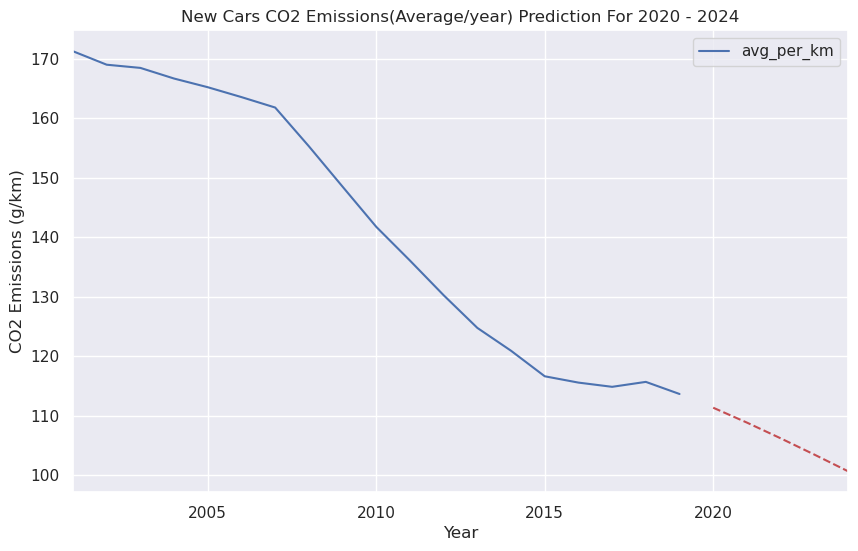

In [174]:
new_df.reset_index(inplace=True)

# plot historical data
new_df.plot(x='Year', y='avg_per_km', figsize=(10,6))

# plot forecasted data
forecast.plot(x='Year', y='Prediction', style='r--', label='Prediction')

# set plot title and axis labels
plt.title('New Cars CO2 Emissions(Average/year) Prediction For 2020 - 2024')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (g/km)')

# show the plot
plt.show()
